<a href="https://colab.research.google.com/github/Yaswanth-A9/-Disease-Prediction-Toolkit-Building-and-Evaluating-ML-Models/blob/main/Disease_Prediction_Toolkit_Building_and_Evaluating_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COLAB SETUP

In [53]:
from google.colab import files
uploaded = files.upload()  # Upload kaggle.json or directly diabetes.csv


Saving kaggle.json to kaggle (5).json


In [54]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [55]:
!pip install kaggle

In [56]:
!kaggle datasets download -d mathchi/diabetes-data-set

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
diabetes-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
!unzip diabetes-data-set.zip

Archive:  diabetes-data-set.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Important Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, roc_curve)


## 1. Load the dataset

In [59]:
df = pd.read_csv('diabetes.csv')  # ensure diabetes.csv is available
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## 2. Preliminary checks

In [60]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

## 3. Handle missing or invalid values

In [61]:
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in invalid_zero_cols:
    df[col] = df[col].replace(0, np.nan)

print("Missing values after conversion:")
print(df[invalid_zero_cols].isnull().sum())
# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

Missing values after conversion:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


## 4. Split features and target

In [62]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## 5. Feature scaling

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 6. Train-test split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 7. Model training

In [65]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)

## 8. Evaluation & Visualization


==== Logistic Regression ====
Accuracy: 0.6948051948051948
Precision: 0.5777777777777777
Recall: 0.48148148148148145
F1 Score: 0.5252525252525253
ROC AUC: 0.8116666666666666


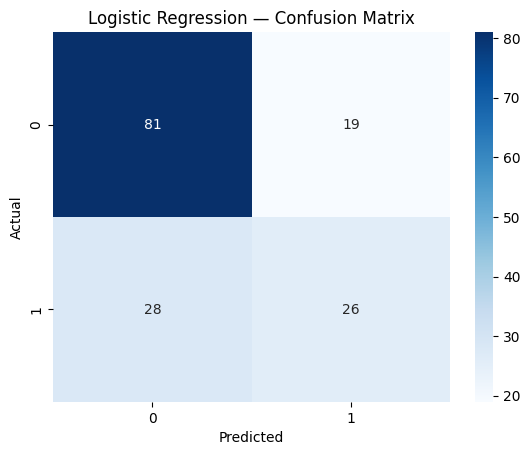

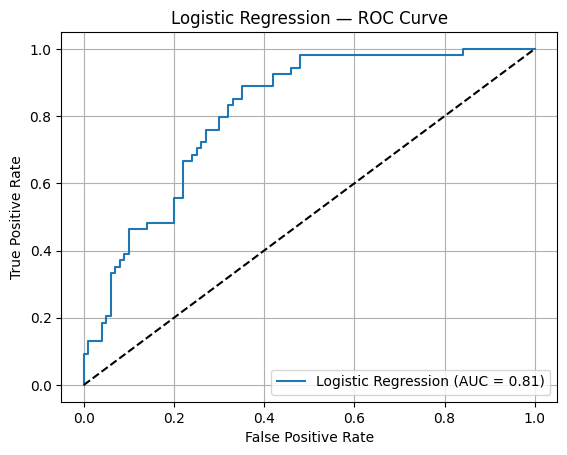


==== Decision Tree ====
Accuracy: 0.6688311688311688
Precision: 0.5333333333333333
Recall: 0.4444444444444444
F1 Score: 0.48484848484848486
ROC AUC: 0.6172222222222222


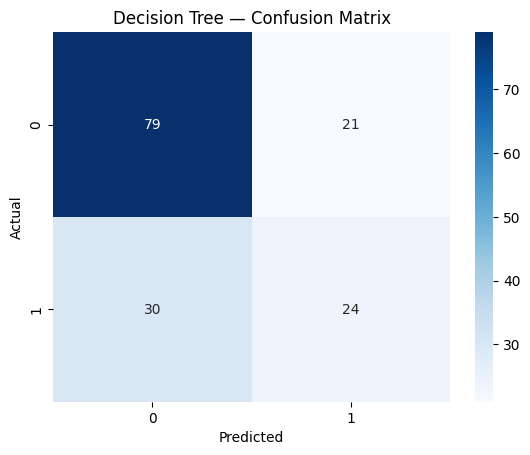

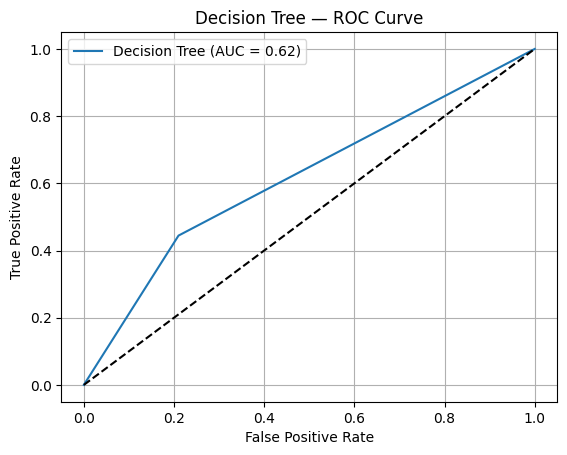


==== Random Forest ====
Accuracy: 0.7857142857142857
Precision: 0.723404255319149
Recall: 0.6296296296296297
F1 Score: 0.6732673267326733
ROC AUC: 0.8141666666666667


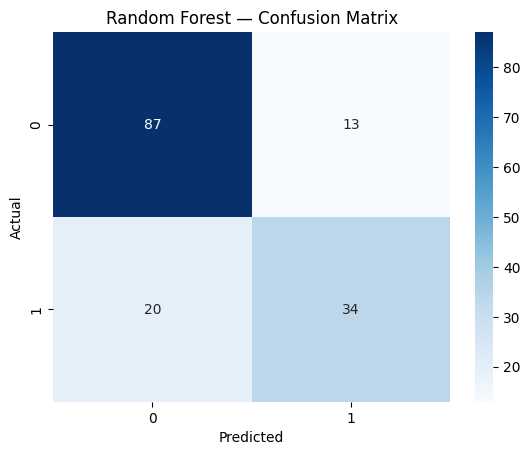

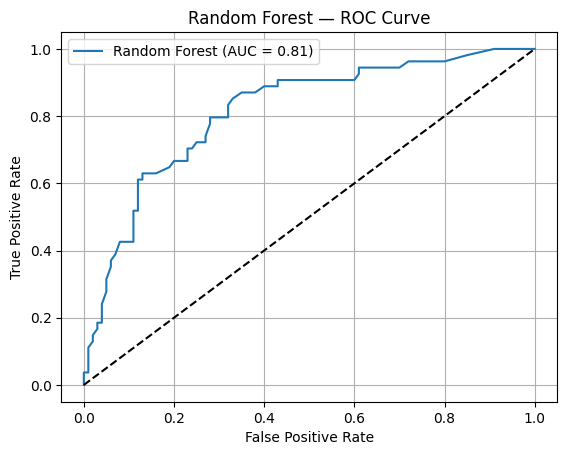

In [66]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n==== {name} ====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_prob is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_prob))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{name} — ROC Curve")
        plt.legend()
        plt.grid(True)
        plt.show()

for name, model in models.items():
    evaluate_model(name, model)